-Komal Jaiswal

-Kq2587


#Jena Flower Image Classification using CNN

#Model 1 from scratch using CNN layers

This data set contains the images of 30 wild flowering angiosperm species. Classes are represented by 1 to 30 with a total of 1479 images.

This dataset is uploaded to the drive and mounted to google colaboratory using the below code:

In [37]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 1: Import Libraries

In [2]:
from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.15.0


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator



Using TensorFlow backend.


##Step2: Import images
All the image files are imported from the dataset and saved  as list in jena_image

In [0]:
import os
jena_image=list()
for file in os.listdir("/content/drive/My Drive/Jena"):
        img=jena_image.append(os.path.join("/content/drive/My Drive/Jena",file))     

The list (jena_image) which contains path of all image files are converted to dataframe jena_df , sorted and saved in the first column of the dataframe.

In [5]:
jena_df = pd.DataFrame(jena_image)
jena_df['colFromIndex'] = jena_df.index
jena_df = jena_df.sort_values([0, 'colFromIndex'])
jena_df=jena_df.reset_index()
jena_df.head()

,index,0,colFromIndex
0,999,/content/drive/My Drive/Jena/JFT_00001.jpg,999
1,997,/content/drive/My Drive/Jena/JFT_00002.jpg,997
2,998,/content/drive/My Drive/Jena/JFT_00003.jpg,998
3,996,/content/drive/My Drive/Jena/JFT_00004.jpg,996
4,995,/content/drive/My Drive/Jena/JFT_00005.jpg,995


The text file which contains the label of the images are imported as a dataframe, sorted and then saved in label_df with first column as the name of the file and corresponding label in the second column.

In [6]:

label_df = pd.read_csv('classlabels.txt',header=None)
len(label_df)
label_df['colFromIndex'] = label_df.index
label_df= label_df.sort_values([0,'colFromIndex'])
label_df=label_df.reset_index()
label_df.head()

,index,0,1,colFromIndex
0,0,JFT_00001.jpg,1,0
1,1,JFT_00002.jpg,1,1
2,2,JFT_00003.jpg,1,2
3,3,JFT_00004.jpg,1,3
4,558,JFT_00005.jpg,1,558


##Step 3: Preprocess
The package cv2 is imported and images are read, resized to a size of (32,32) and stored in the dataframe jena_df. Now we have corresponding array representation of the image instead of the image path in the jena_df.

In [7]:
i=0
import cv2
import numpy as np
while i<len(jena_df[0]):
  a=cv2.imread(jena_df[0][i])
  a=cv2.resize(a,(32,32))
  jena_df[0][i]=a
  i+=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


The label_df  which has the label of the image is combined with the dataframe jena_df . Therefore in jena_df , we have array representation of the images in first column, name of the image in second column and corresponding label in the third column.

In [8]:
jena_df[1]=label_df[0]
jena_df[2]=label_df[1]
print(jena_df.head(5))
print(jena_df.tail(5))

   index                                                  0  ...              1  2
0    999  [[[74, 86, 74], [75, 87, 75], [75, 85, 72], [7...  ...  JFT_00001.jpg  1
1    997  [[[49, 44, 46], [48, 45, 47], [50, 47, 49], [4...  ...  JFT_00002.jpg  1
2    998  [[[123, 130, 145], [108, 116, 129], [109, 115,...  ...  JFT_00003.jpg  1
3    996  [[[126, 126, 162], [129, 131, 165], [132, 141,...  ...  JFT_00004.jpg  1
4    995  [[[110, 113, 147], [110, 115, 146], [111, 119,...  ...  JFT_00005.jpg  1

[5 rows x 5 columns]
      index  ...   2
1474    978  ...  30
1475    979  ...  30
1476    980  ...  30
1477    981  ...  30
1478    982  ...  30

[5 rows x 5 columns]


##Splitting the dataset into training and validation 

Using the function train_test_split the dataframe jena_df is splitted into train and test data.

In [0]:
from sklearn.model_selection import train_test_split
train_jena, test_jena, train_label, test_label = train_test_split(jena_df[0], jena_df[2], test_size=0.2)

Here we are using np.stack method to convert the training and testing image arrays to 4D arrays. The 4D arrays are stored in the directory and again loaded in to train_jena and test_jena for train and test data respectiveley.

In [0]:
train=np.save('/content/drive/My Drive/train', np.stack(train_jena,axis=0))
test=np.save('/content/drive/My Drive/test', np.stack(test_jena,axis=0))

In [0]:
train_jena=np.load('/content/drive/My Drive/train.npy')
test_jena = np.load('/content/drive/My Drive/test.npy')


Train and test data are converted to float and normalized .



In [0]:
train_jena=train_jena.astype('float32')/255
test_jena=test_jena.astype('float32')/255

In [13]:
np.stack(jena_df[0],axis=0).shape

(1479, 32, 32, 3)

In [14]:
test_jena.shape

(296, 32, 32, 3)

###One-hot-encoding for target labels.

In [15]:
train_label=train_label.astype('category')
dummies_train= pd.get_dummies(train_label)
dummies_train.head()

2,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1431,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
402,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
285,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [16]:
test_label=test_label.astype('category')
dummies_test= pd.get_dummies(test_label)
dummies_test.head()

2,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
737,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1363,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
137,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##Step 4: Build Model

Built model using Batch Normalization:

In [17]:
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_jena.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(800))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(30))
    model.add(Activation('softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 32)       

In [19]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss="categorical_crossentropy",
              metrics=['accuracy'])


##Fit Model

In [20]:
history = model.fit(train_jena, dummies_train, batch_size=128, validation_data = (test_jena, dummies_test), epochs=15)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1183 samples, validate on 296 samples
Epoch 1/15





1183/1183 [==============================] - 4s 4ms/step - loss: 3.4027 - acc: 0.1014 - val_loss: 2.8191 - val_acc: 0.2264
Epoch 2/15
1183/1183 [==============================] - 4s 3ms/step - loss: 2.4626 - acc: 0.2646 - val_loss: 2.2541 - val_acc: 0.3345
Epoch 3/15
1183/1183 [==============================] - 4s 3ms/step - loss: 2.0251 - acc: 0.3686 - val_loss: 1.9110 - val_acc: 0.4122
Epoch 4/15
1183/1183 [==============================] - 4s 3ms/step - loss: 1.6199 - acc: 0.4962 - val_loss: 1.6188 - val_acc: 0.5439
Epoch 5/15
1183/1183 [==============================] - 4s 3ms/step - loss: 1.3436 - acc: 0.5841 - val_loss: 1.3533 - val_acc: 0.6284
Epoch 6/15
1183/1183 [==============================] - 4s 3ms/step - loss: 1.1182 - acc: 0.6441 - val_loss: 1.3121 - val_acc: 0.6216
Epoch 7/15
1183/1183 [==========================

From the above output we can see that at epoch 15 validation accuracy is 86.4%.

##Step5: Plot Results

###Plot for accuracy

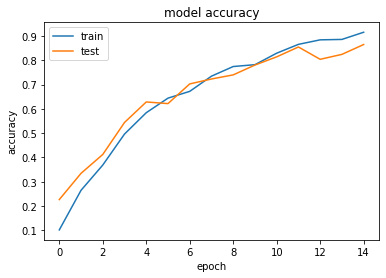

In [21]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Plot for loss

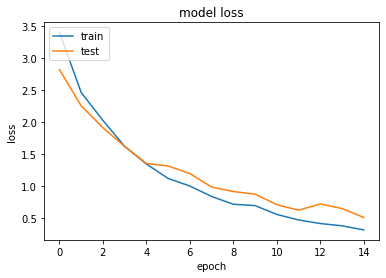

In [22]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

###Maximum  training and validation accuracy.

In [23]:
print(max(history.history["acc"]))
print(max(history.history["val_acc"]))

0.9154691455833809
0.8648648664758012


### Baseline Accuracy of the Model

In [24]:
print(jena_df[2].value_counts())# Displays count of each class
a=max(jena_df[2].value_counts())# take the class with maximum count
b=sum(jena_df[2].value_counts())# total no of instances
print("Baseline_Accuracy=",a/b*100)

6     70
28    68
23    67
13    66
4     66
2     65
7     64
18    63
29    63
20    61
27    61
24    60
10    60
25    56
19    55
14    54
5     54
22    49
12    48
9     46
17    45
3     41
21    38
11    36
26    35
8     28
16    24
15    13
30    12
1     11
Name: 2, dtype: int64
Baseline_Accuracy= 4.732927653820148


For this given data set the baseline accuracy is 4.7%

### Built Model with Data Augmentation using ImageDataGenerator:

In [25]:
datagen_jena = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

datagen_jena.fit(train_jena)

#Fit Generator
history_jena=model.fit_generator(datagen_jena.flow(train_jena, dummies_train, batch_size=32),steps_per_epoch=train_jena.shape[0],
                validation_data= (test_jena,dummies_test),epochs=10)

Epoch 1/10
1183/1183 [==============================] - 145s 123ms/step - loss: 0.7809 - acc: 0.7357 - val_loss: 6.8642 - val_acc: 0.0743
Epoch 2/10
1183/1183 [==============================] - 144s 121ms/step - loss: 0.3538 - acc: 0.8754 - val_loss: 7.9381 - val_acc: 0.0676
Epoch 3/10
1183/1183 [==============================] - 149s 126ms/step - loss: 0.2467 - acc: 0.9133 - val_loss: 8.2170 - val_acc: 0.1047
Epoch 4/10
1183/1183 [==============================] - 151s 128ms/step - loss: 0.1988 - acc: 0.9286 - val_loss: 8.1201 - val_acc: 0.1453
Epoch 5/10
1183/1183 [==============================] - 150s 127ms/step - loss: 0.1625 - acc: 0.9420 - val_loss: 8.6744 - val_acc: 0.1081
Epoch 6/10
1183/1183 [==============================] - 150s 127ms/step - loss: 0.1403 - acc: 0.9504 - val_loss: 9.5525 - val_acc: 0.0777
Epoch 7/10
1183/1183 [==============================] - 147s 125ms/step - loss: 0.1200 - acc: 0.9583 - val_loss: 8.3029 - val_acc: 0.1149
Epoch 8/10
1183/1183 [============

From the output we can see that at the epoch 4 validation accuracy is 14.5%

In [26]:
print(max(history_jena.history["acc"]))
print(max(history_jena.history["val_acc"]))

0.9679568524105244
0.14527027027027026


###Data Augmentation: Plot for Accuracy

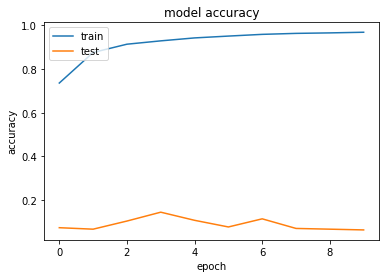

In [27]:
plt.plot(history_jena.history["acc"])
plt.plot(history_jena.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Model 2: Fine Tuning

###FineTuning Approach

* The task of fine-tuning a network is to tweak the parameters(weights) of an already trained network so it adapts to the new task at hand.
* In general,  initial layers always learn very general features and as we go higher up the network the layers tend to learn patterns more specific to the task.
* So for fine-tuning we freeze the initial layers and retrain the last layers.
* So, Here we are Fine tuning using VGG model
* We are freezing all layers except last 4 layers

###Importing the vgg16 Model

In [0]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


###Setting just last 4 layers as trainable and freeze other layers.

In [29]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7f6605c5d198> False
<keras.layers.convolutional.Conv2D object at 0x7f6605c5d9e8> False
<keras.layers.convolutional.Conv2D object at 0x7f65fea725f8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f65ffc4ce10> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc57e80> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc626d8> False
<keras.layers.pooling.MaxPooling2D object at 0x7f65ffc66438> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc6cba8> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc70c88> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc75b70> False
<keras.layers.pooling.MaxPooling2D object at 0x7f65ffc84358> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc0ba90> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc13ba8> False
<keras.layers.convolutional.Conv2D object at 0x7f65ffc17a20> False
<keras.layers.pooling.MaxPooling2D object at 0x7f65ffc25438>

###Adding  layers to vgg16 Model

In [30]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(30, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 800)               410400    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                24030     
Total params: 15,149,118
Trainable params: 7,513,854
Non-trainable params: 7,635,264
_________________________________________________________________


In [34]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history=  model.fit(train_jena, dummies_train, steps_per_epoch=2,
                validation_data= (test_jena,dummies_test),epochs=15,validation_steps=2)

Train on 1183 samples, validate on 296 samples
Epoch 1/15
2/2 [==============================] - 87s 43s/step - loss: 3.0417 - acc: 0.4544 - val_loss: 1.9022 - val_acc: 0.4628
Epoch 2/15
2/2 [==============================] - 87s 44s/step - loss: 2.2716 - acc: 0.4201 - val_loss: 1.2980 - val_acc: 0.5946
Epoch 3/15
2/2 [==============================] - 86s 43s/step - loss: 1.4280 - acc: 0.5697 - val_loss: 1.1190 - val_acc: 0.6757
Epoch 4/15
2/2 [==============================] - 85s 43s/step - loss: 1.1136 - acc: 0.6407 - val_loss: 1.0057 - val_acc: 0.7027
Epoch 5/15
2/2 [==============================] - 88s 44s/step - loss: 1.0276 - acc: 0.6746 - val_loss: 0.9445 - val_acc: 0.6959
Epoch 6/15
2/2 [==============================] - 85s 42s/step - loss: 1.0354 - acc: 0.6674 - val_loss: 1.0580 - val_acc: 0.6723
Epoch 7/15
2/2 [==============================] - 84s 42s/step - loss: 0.9745 - acc: 0.6927 - val_loss: 1.0273 - val_acc: 0.6655
Epoch 8/15
2/2 [==============================] - 

From the above output we can see that in the epoch 8 validation accuracy  is 76%.

###Plot for Accuracy

<Figure size 432x288 with 0 Axes>

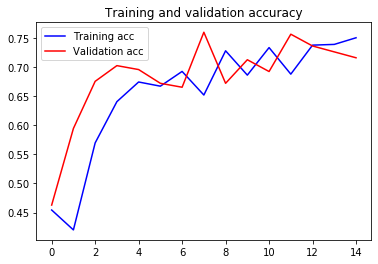

<Figure size 432x288 with 0 Axes>

In [35]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 

###Plot for Loss

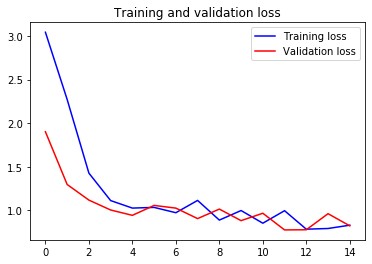

In [36]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

From the above plot we can see that the accuracy for both the training and validation data is increasing and loss is decreasing with epochs. Also we can observe less generalization gap now. We will get a better prediction rate when the model is trained for more epochs.

###Results:
Model 1 ( 86.4%) and Model 2(76%) had outperformed the baseline acuuracy of 4.7%